In [1]:
from  langgraph.graph import StateGraph,START,END

In [2]:
print("helo world")

helo world


In [3]:
# agentic ai sequential workflow
from dotenv import load_dotenv


In [4]:
from langchain_huggingface import HuggingFaceEndpoint,ChatHuggingFace


In [7]:
load_dotenv()

True

In [8]:
import os
hf_token=os.getenv("HUGGINGFACEHUB_ACCESS_TOKEN")


In [10]:
llm=HuggingFaceEndpoint(
    repo_id="google/gemma-3-27b-it",
    task="text-genration",
    huggingfacehub_api_token=hf_token,
)

c:\Users\rahul\agentic ai cx\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
model=ChatHuggingFace(llm=llm)

In [12]:
result=model.invoke("what is the capital of india")

In [16]:
print(result.content)

The capital of India is **New Delhi**. 

It's important to note that while Delhi is a union territory, *New Delhi* is the specific capital city within that territory, and is where all the government functions are centered.






In [17]:
from typing import TypedDict

In [18]:
# now we want to create  a workflow on bmi calculator on sequential workflow 
class Bmistate(TypedDict):
    
    weight_kg:float
    height_m:float
    bmi:float


In [19]:
graph=StateGraph(Bmistate)

In [41]:
def bmi_calculator(state:Bmistate)->Bmistate:
    weight=state['weight_kg']
    height=state['height_m']

    bmi=weight/(height**2)

    state['bmi']=round(bmi,2)

    return state

In [49]:
# now we have create the workflow
# start -> bmi_calci-> end
# add node to flow
graph.add_node('calculator_bm',bmi_calculator)



Adding a node to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [50]:
# add edges to flow
graph.add_edge(START,'calculator_bm')
graph.add_edge('calculator_bm',END)

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [51]:
workflow=graph.compile() # compile the graph

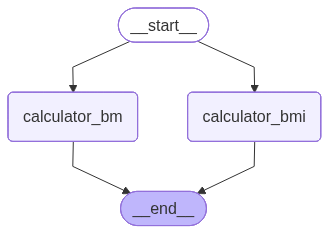

In [52]:
workflow

In [47]:
intial_state={'weight_kg':56,'height_m':670}
final_state=workflow.invoke(intial_state)

In [54]:
final_state

{'weight_kg': 56, 'height_m': 670, 'bmi': 0.0001247493873914012}